In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import pdb
import h5py
import subprocess
import datetime
import pandas as pd
import copy

import platform
if platform.system() == 'Darwin':
    # On a Mac: usetex ok
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=True)
elif platform.node().startswith("D"):
    # On hyak: usetex not ok, must change backend to 'agg'
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)
    plt.switch_backend('agg')
else:
    # On astro machine or other linux: usetex not ok
    plt.switch_backend('agg')
    mpl.rc('font', family='Times New Roman')
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)

/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/linalg/__init__.py:202: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/optimize/_trlib/__init__.py:1: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._trlib import TRLIBQuadraticSubproblem
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate bi

In [2]:
import coronagraph as cg
from jakely.plot import ColorTable

/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/interpolate/_bsplines.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _bspl
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/__init__.py:94: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .ckdtree import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/__init__.py:95: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .qhull import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/_spherical_voronoi.py:18: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _voronoi
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/distance.py:121: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, go

In [3]:
sys.path.insert(1, "../scripts")

import spectroscopy

In [4]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

# Updates to the DRM:
1. New input catalog from Chirs
2. Unique exo-Zodi distribution for each system from Chris, now accounted for
3. Coronagraph contrast and throughput now depend on the type of coronagraph and the planet-star angular separation in $\lambda/D$ 
4. Now using 20% bandpasses in the UV and visible and 10% in the NIR

In [5]:
drmB_DMVC = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    #bandwidth = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "B (DMVC1)",       # Now specifying APLC coronagraph 
    telescope_mods = {})

# Calculate table of exposure times
drmB_DMVC.generate_exptime_table()

/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/Jake/Projects/coronagraph/coronagraph/noise_routines.py:1017: RuntimeWarning: invalid value encountered in greater
  i = (cp > 0.)
/Users/Jake/Projects/coronagraph/coronagraph/noise_routines.py:1018: RuntimeWarning: invalid value encountered in less_equal
  j = (cp <= 0.0)


No exact match found
Using F5V for F3/F5V
No exact match found
Using G1V for G1.5Vb
No exact match found
Using F7V for F6/F7V
No exact match found
Using K0V for K0VSB
No exact match found
Using G6IV for G6IV+...
No exact match found
Using M2V for M1/M2V
No exact match found
Using K4V for K4Vp


In [6]:
drmB_DMVC.prep_ith_star(0)

In [7]:
print(drmB_DMVC.cn.star)
print(drmB_DMVC.cn.planet)

Star: 
-----
- Effective Temperature (K) : 6140.0
- Radius (Solar Radii) : 1.3
Planet: 
-------
- Planet name  : earth
- Stellar type of planet host star : sun
- Distance to system (pc) : 8.53476
- Number of exzodis (zodis) : 1.25115
- Radius of planet (Earth Radii) : 1.0
- Semi-major axis (AU) : 1.3948029235625377
- Phase angle (deg) : 90.0
- Lambertian phase function : 0.3183098861837907
- Zodiacal light surface brightness (mag/arcsec**2) : 23.0
- Exozodiacal light surface brightness (mag/arcsec**2) : 22.0


/Users/Jake/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


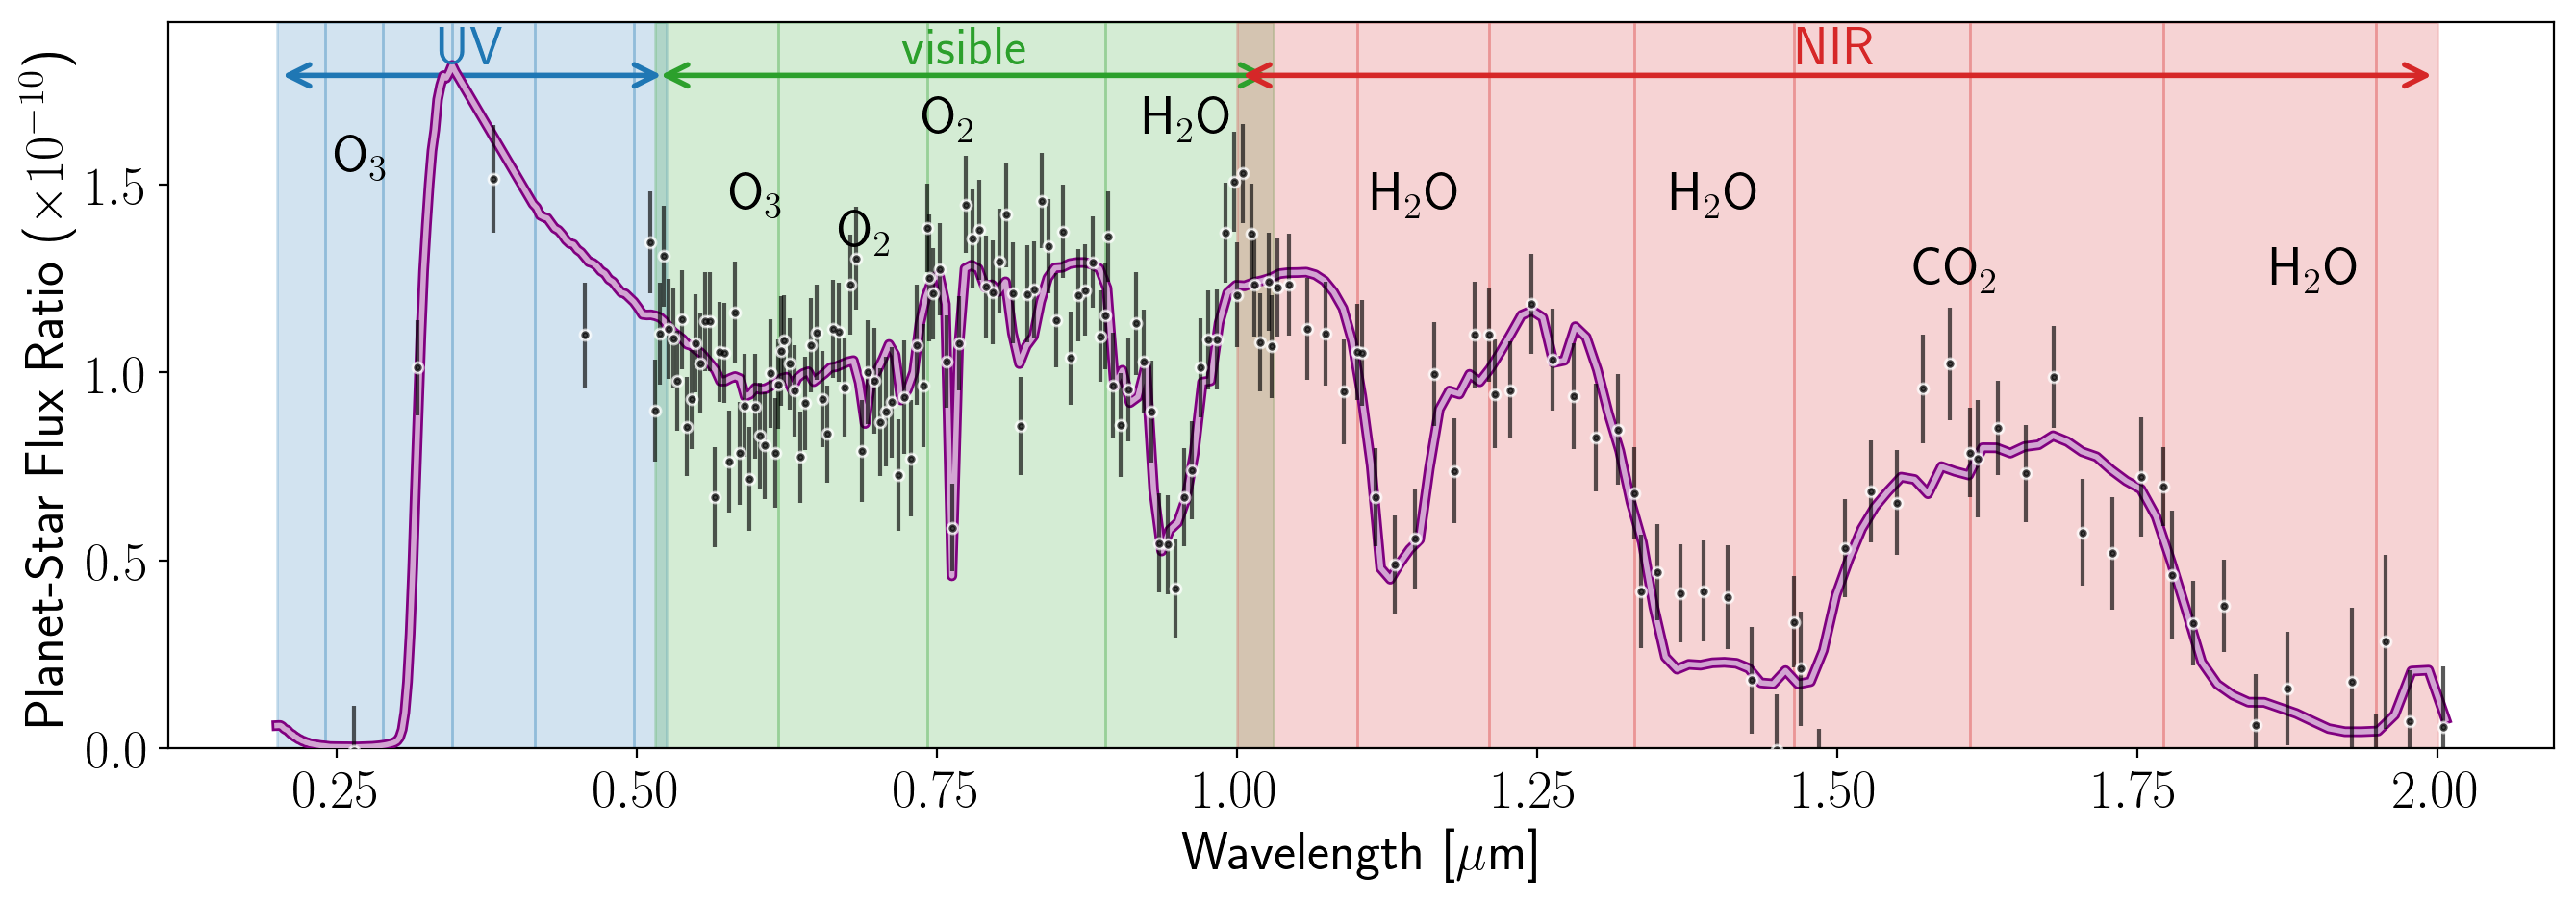

In [8]:
fig, ax = drmB_DMVC.plot_observed_spectrum(yloc = 1.79)

In [9]:
drmB_DMVC.exptime_table

,HIP,type,d [pc],UV 1,UV 2,UV 3,UV 4,UV 5,UV 6,vis 1,...,vis 4,NIR 1,NIR 2,NIR 3,NIR 4,NIR 5,NIR 6,NIR 7,NIR 8,Spec. Completeness
0,54035,M2V,2.5468599999999997,5939508.235676214,12880.816735320243,135.52570740174744,10.750603383920703,1.2210162012822223,1.454403547425998,7.993599317427529,...,2.511396741259338,3.0968199153755847,3.13507778797904,3.8790947585458735,6.334970949371976,12.229939296360266,28.229839551467375,93.40451614367997,247.6987047412067,1.0
1,104217,K7V,3.4947199999999996,44745.68781167376,376.19047686402877,19.42076261371678,3.8015284520890336,0.8406815889729032,1.3172713554265842,8.176048976405738,...,5.869728492603819,4.70713976287236,4.758727376964583,5.464070320913651,7.046835900890228,9.72972946002222,15.046789466610862,30.627355311653325,85.17159336993589,1.0
2,104214,K5V,3.4971699999999997,9561.528151503557,270.32632366379306,12.036272692012437,3.93467502421718,0.8274527239497365,1.3831364325429927,9.015335480921612,...,8.944633619307746,6.011063624486937,6.3071862539538035,7.366753498314148,9.508164733413935,12.794778296311533,18.428198684557735,33.76948474509067,87.32898308017076,1.0
3,88601,K0VSB,5.0833699999999995,1825.0247933239962,80.62852389114786,13.167805751496472,5.153067395470397,0.667439390559131,1.2708821950300393,9.862557469180492,...,8.984131711892061,14.479959690263758,15.631233627306472,19.09439706081678,26.721916643539757,39.15231777720675,64.28384736504272,158.05384185764586,556.9660405704989,1.0
4,3765,K2V,7.435,23406.77933766298,437.06772756102583,33.9893928154285,11.210916055492264,2.511223577027325,4.6455062365404896,38.536844022123844,...,43.16374620432742,118.77814138678897,144.53300059686717,206.19864906649744,344.18519681531006,672.4483748256075,1566.495360735656,4691.6479508384045,14553.707665860093,1.0
5,1599,F9V,8.53476,nan,243.70755240763637,16.884024030730284,12.112301368399972,2.5976444938780374,4.625716255138804,42.9304423713609,...,81.712186552084,142.01093712935923,170.0439330058267,223.8641376343031,328.2364987834401,511.2965393025072,855.156845730993,2185.0970187780604,8070.540641780151,0.9782608695652175
6,7981,K1V,7.605119999999999,14203.73014668567,334.584328483526,34.80688653099705,14.03214046435934,4.011386299707558,8.092928632046783,61.67890363548368,...,103.55797777384981,156.66590698740876,190.5767508613831,269.4512955218241,440.4463355290432,810.3464753010437,1798.505457973748,5165.39084064263,15557.693468692987,1.0
7,16537,K2V,3.20288,nan,nan,31.86699887752945,15.999438285479467,6.183687282977961,11.735436804075002,77.7073197876906,...,128.7390144662416,61.79396595430307,68.22479044717701,80.7838020532666,103.62144263065156,135.64669199084668,184.21037040712278,261.1256103491407,363.1151664353181,0.9521739130434783
8,106440,M1V,4.96506,20294719.015689895,62480.31579006394,789.583083087598,67.16190551944295,8.233185826528054,11.01042680027434,78.88538043499074,...,59.21273143295333,167.9481481984763,253.54180654887034,539.1731090727027,1487.4544056285984,nan,nan,nan,nan,0.7087500000000002
9,27072,F7V,8.88013,nan,100.06895521062279,26.990606487547407,25.876783732401886,9.775610300568136,9.879310030464094,80.70056127436034,...,214.47194789768335,228.00640830418507,267.93896885513107,356.1717582734224,516.0481782777134,776.9292338124629,1268.3893234246389,2981.0099100038206,10389.976802445603,0.9782608695652175


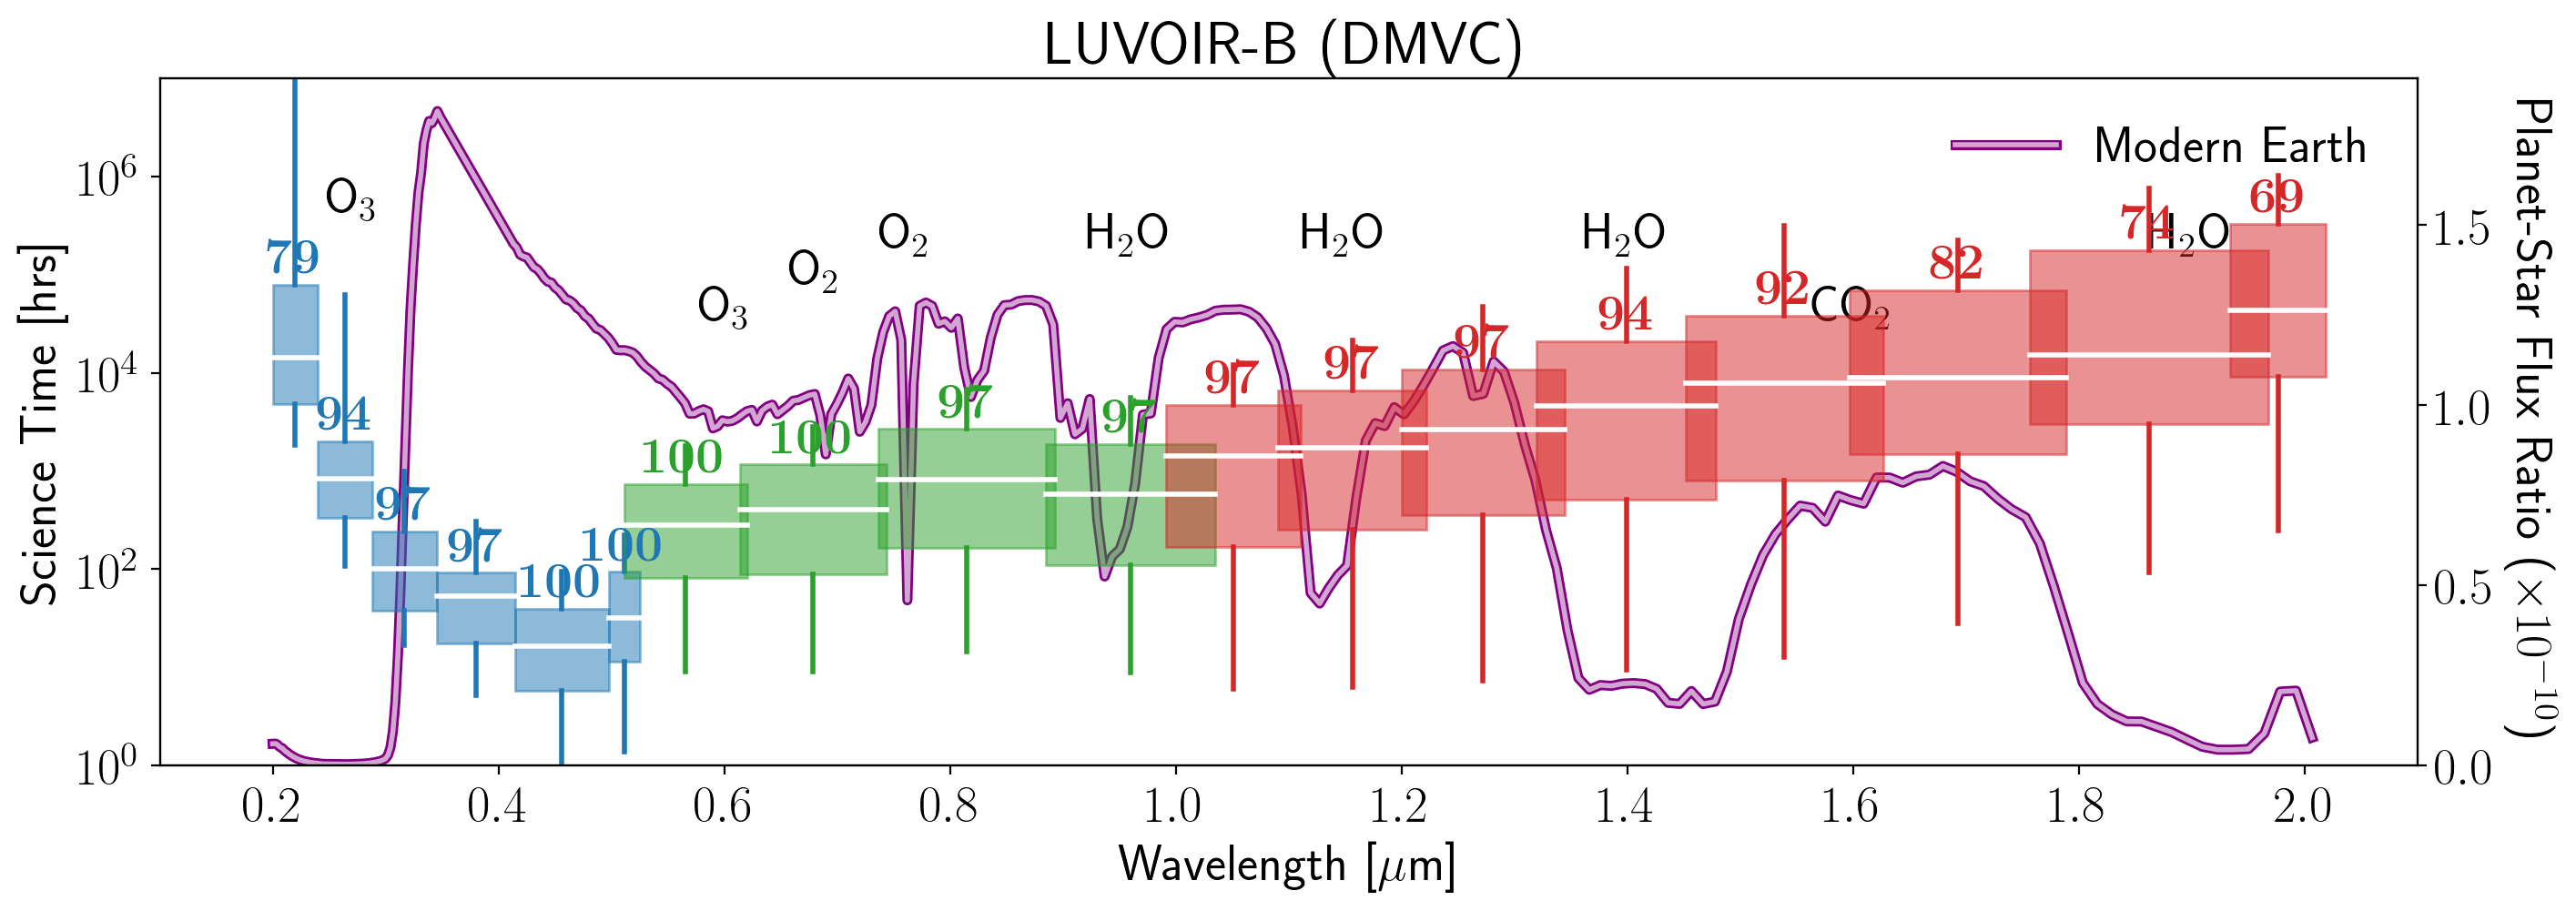

In [10]:
fig = drmB_DMVC.plot_bp_exptimes(plot_spectrum=True, title = "LUVOIR-B (DMVC)")
#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures_new/drm_bptB_DMVC_rev1.png", bbox_inches = "tight")

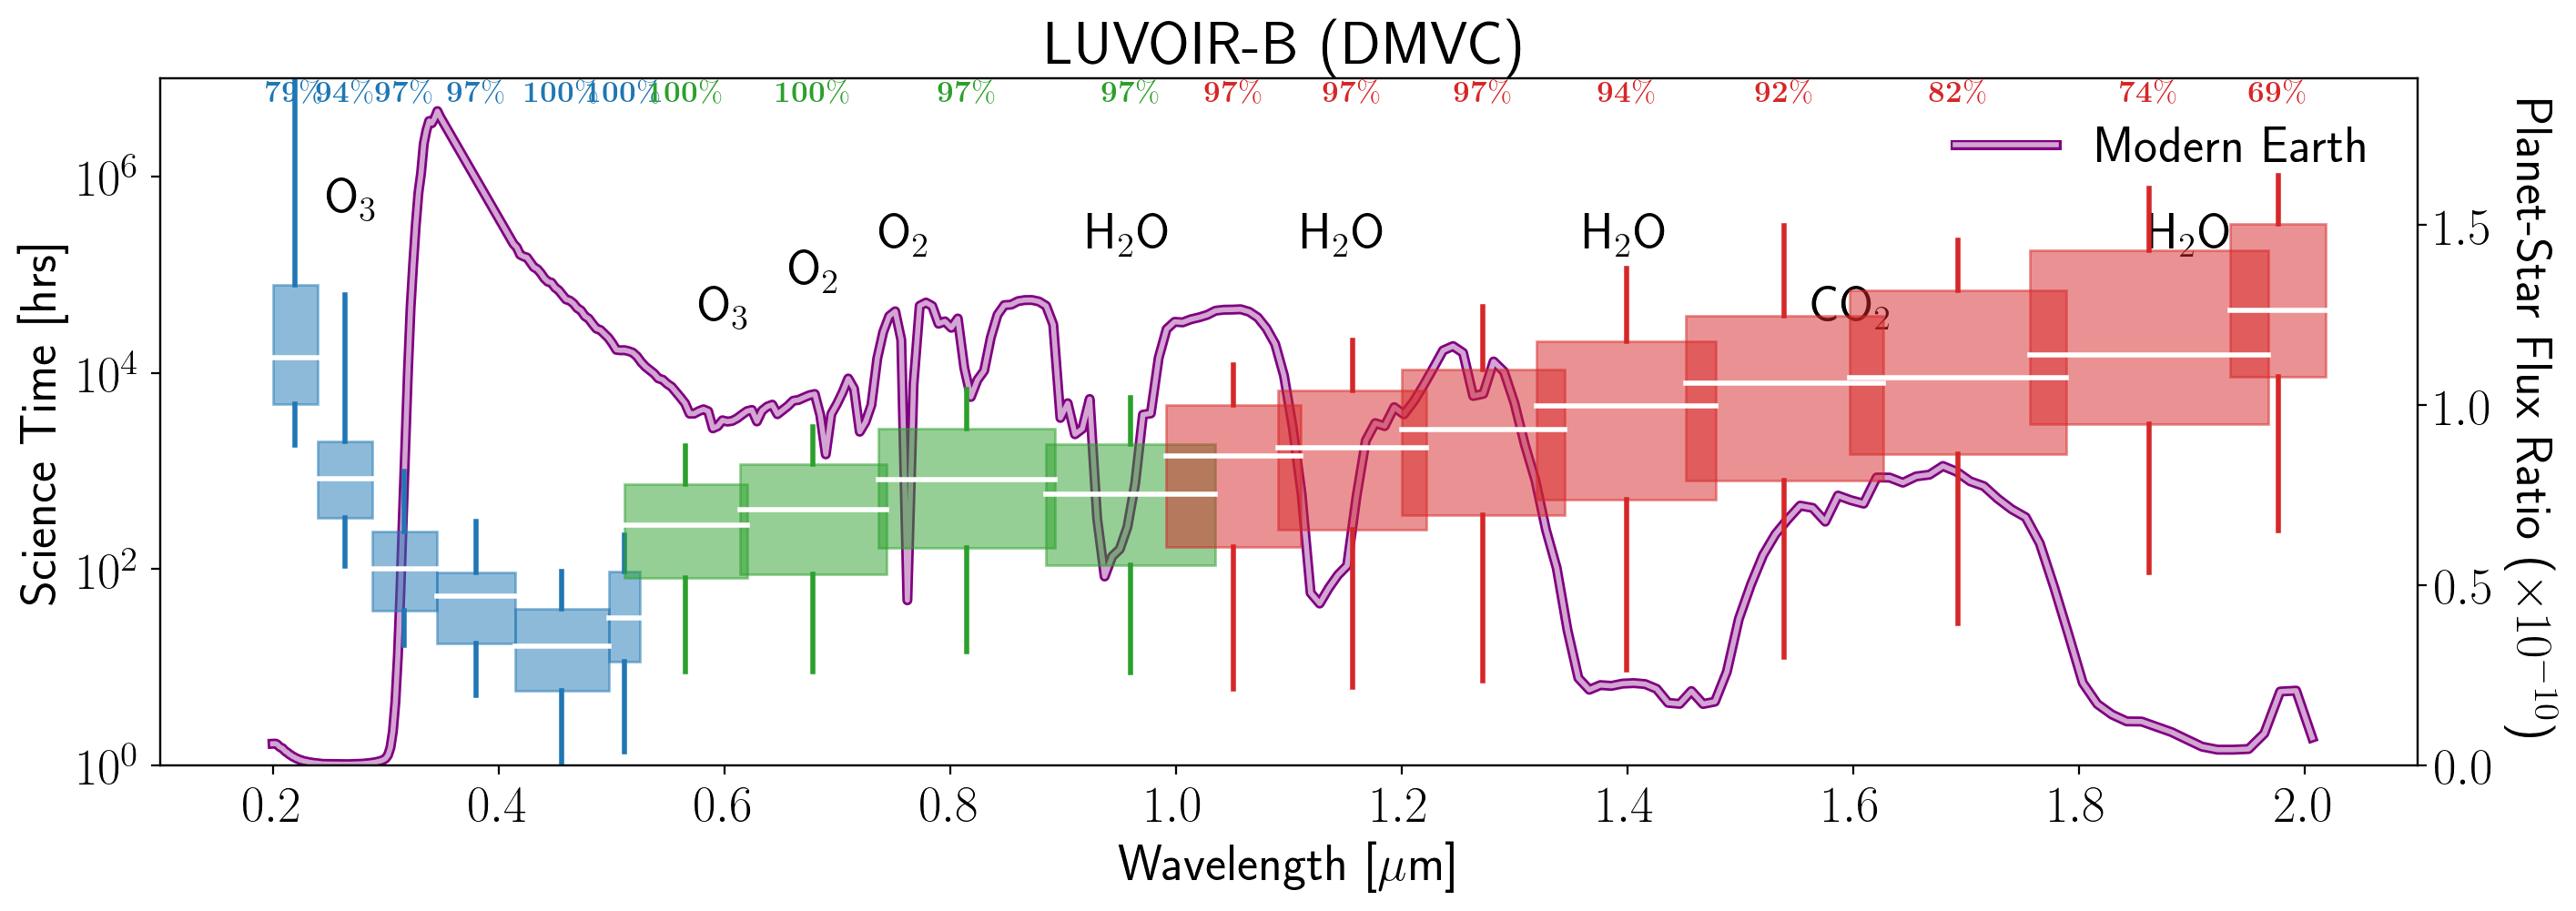

In [9]:
fig = drmB_DMVC.plot_bp_exptimes(plot_spectrum=True, title = "LUVOIR-B (DMVC)")

# Run DRM

In [11]:
drmx = drmB_DMVC

In [12]:
# Define cases 
ibp = np.arange(len(drmx.bp_names))
case_names = [
    "All", 
    "-1 UV", 
    "-1 UV; -1 NIR", 
    "-1 UV; -2 NIR", 
    "-2 UV; -4 NIR",
    "-2 UV; No NIR",
    "Only vis",
    r"Only O$_2$ A-Band"
]
cases = [
    spectroscopy.get_iremove(drmx, Nremove_uv=0, Nremove_nir=0), 
    spectroscopy.get_iremove(drmx, Nremove_uv=1, Nremove_nir=0), 
    spectroscopy.get_iremove(drmx, Nremove_uv=1, Nremove_nir=1), 
    spectroscopy.get_iremove(drmx, Nremove_uv=1, Nremove_nir=2), 
    spectroscopy.get_iremove(drmx, Nremove_uv=2, Nremove_nir=4),
    spectroscopy.get_iremove(drmx, Nremove_uv=2, Nremove_nir=8),
    ibp[(drmx.bp_chan == 0) | (drmx.bp_chan == 2)],
    ibp[(drmx.bandpasses[:,0] > 0.76) | (drmx.bandpasses[:,1] < 0.76)]
]

# Indices of bandpasses to use for each test case
iuse_bps = np.array([np.delete(np.arange(len(drmx.bandpasses)), cases[icase]) for icase in range(len(cases))])

# Complete wavelength ranges for each case
case_ranges = np.array([[drmx.bandpasses[ind].min(), drmx.bandpasses[ind].max()] for ind in iuse_bps])
case_range_strings = ["%.2f - %.2f $\mu$m" %(case_ranges[i,0], case_ranges[i,1]) for i in range(len(case_ranges))]
case_name_strings = [case_names[i]+"\n(%s)" %case_range_strings[i] for i in range(len(cases))]

# Wavelength range completeness (assuming the first case is the full range "all")
case_completeness = (case_ranges[:,1] - case_ranges[:,0]) / (case_ranges[0,1] - case_ranges[0,0])

Text(0,1,'Total Exposure Time (days)')

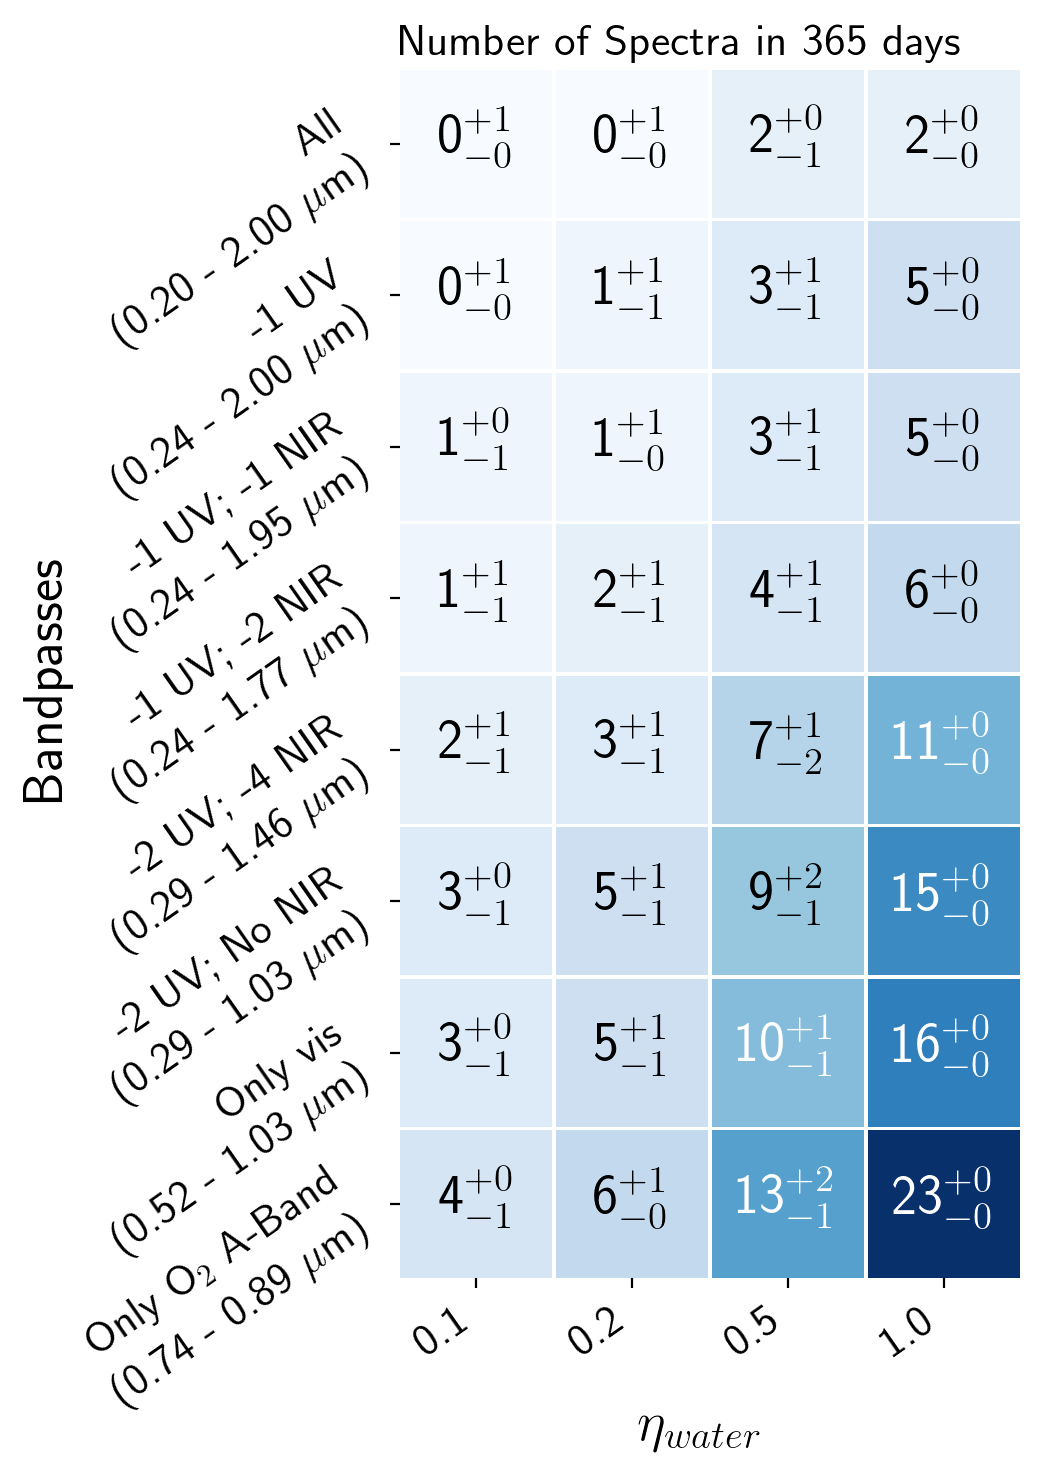

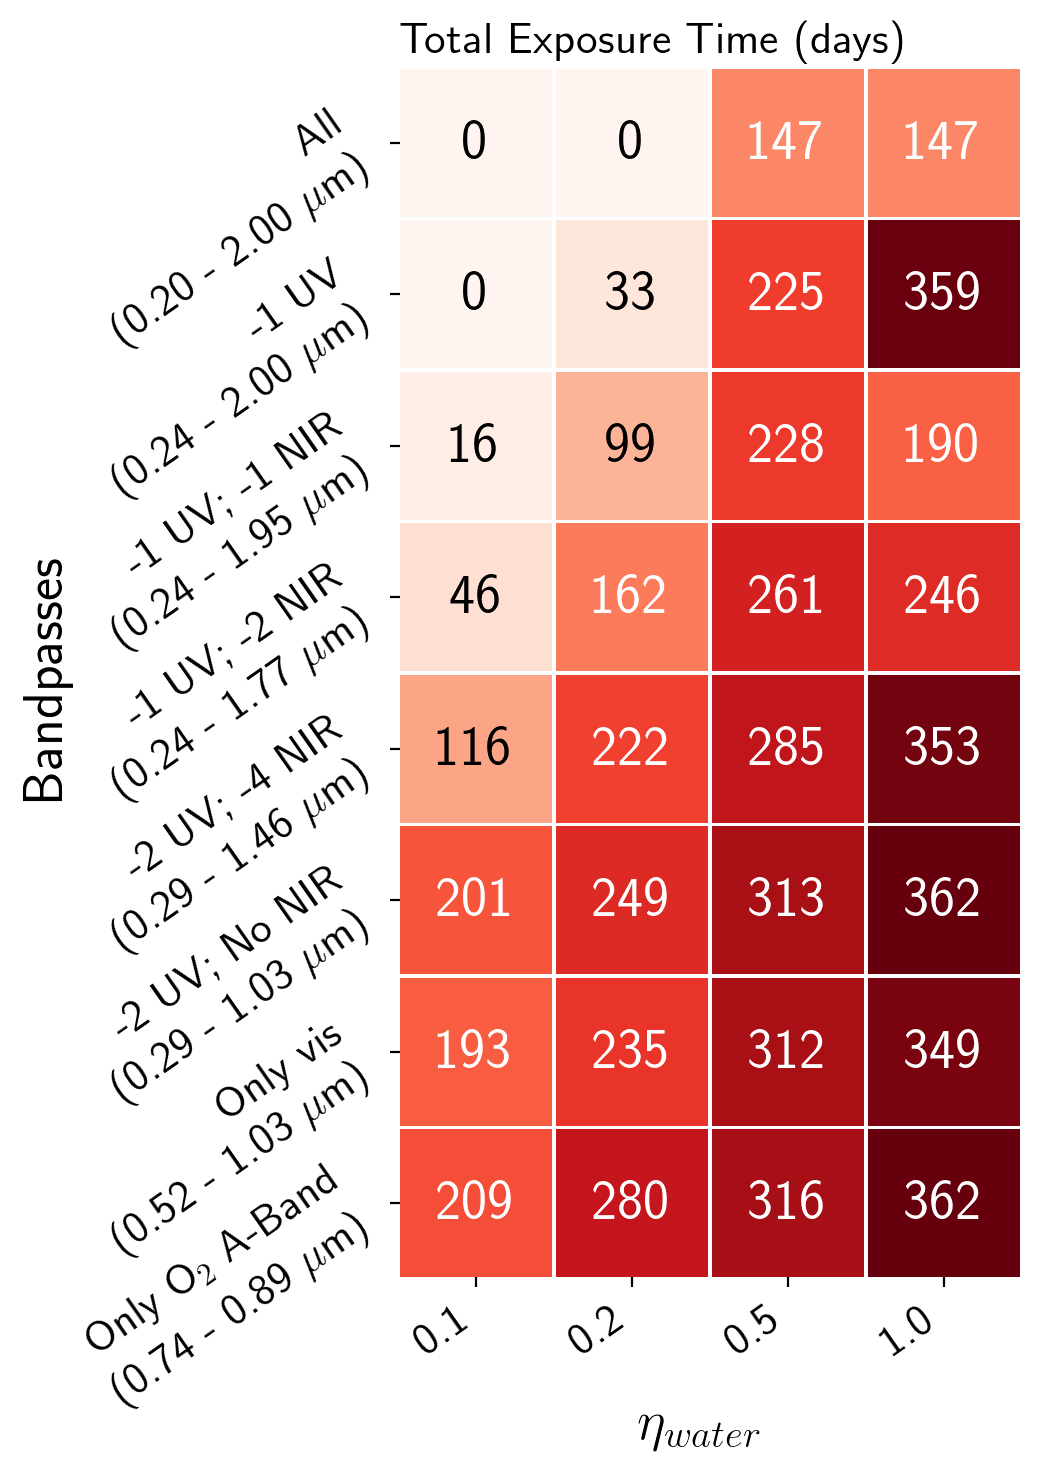

In [24]:
wantexp_days = 365.

# Define eta range
Xdraw = 500
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drmx.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(Ndraws), len(cases), 3))
t_scix = np.zeros((len(Ndraws), len(cases), 3))
t_ovrx = np.zeros((len(Ndraws), len(cases), 3))
countx = np.zeros((len(Ndraws), len(cases), 3))
for i in range(len(Ndraws)):
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraws[i], 
                                                                                                           verbose = False, 
                                                                                                           iremove = cases[j], 
                                                                                                           wantexp_days=wantexp_days)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m

# Make Table of results
fig, ax = ColorTable(etas, case_name_strings, countx[:,:,0], fmt = "%i", data_pm = (countx[:,:,1], countx[:,:,2]), labelfontsize=16, labelrotation=35, 
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of Spectra in %i days" %wantexp_days, ha = "left", fontsize = 16, loc = "left")

fig, ax = ColorTable(etas, case_name_strings, t_totx[:,:,0], fmt = "%i", labelfontsize=16, labelrotation=35, colormap = "Reds",
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01, textsize = 16)
                     #data_pm = (t_totx[:,:,1], t_totx[:,:,2]))
ax[0,0].set_title("Total Exposure Time (days)", ha = "left", fontsize = 16, loc = "left")

Text(0,1,'Total Exposure Time (days)')

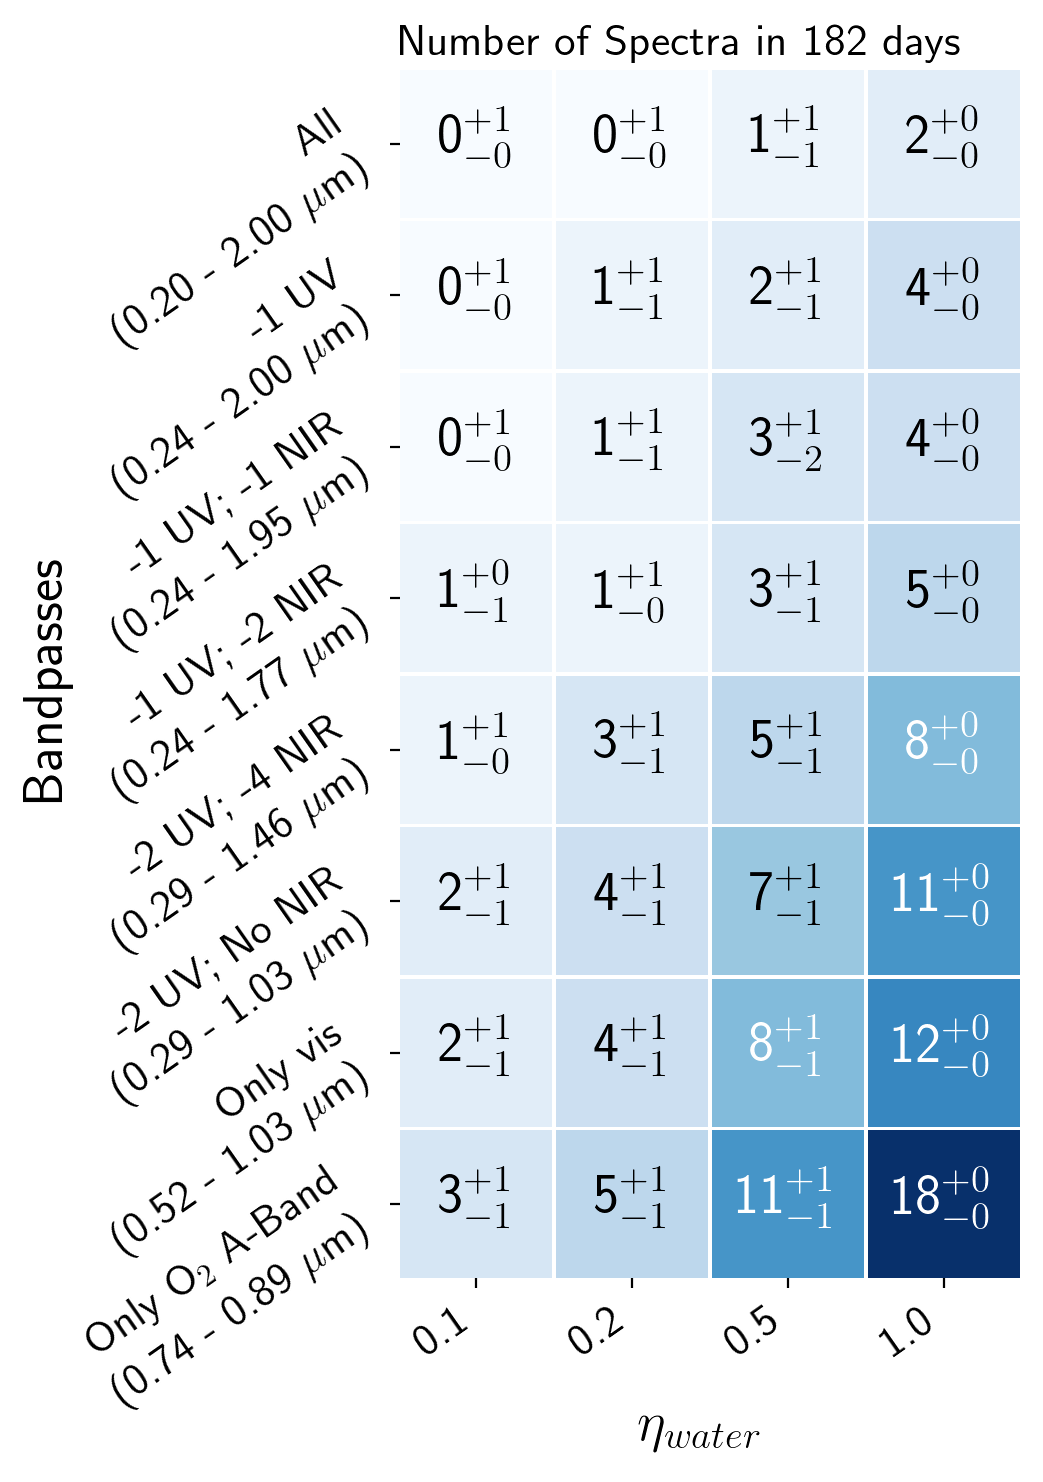

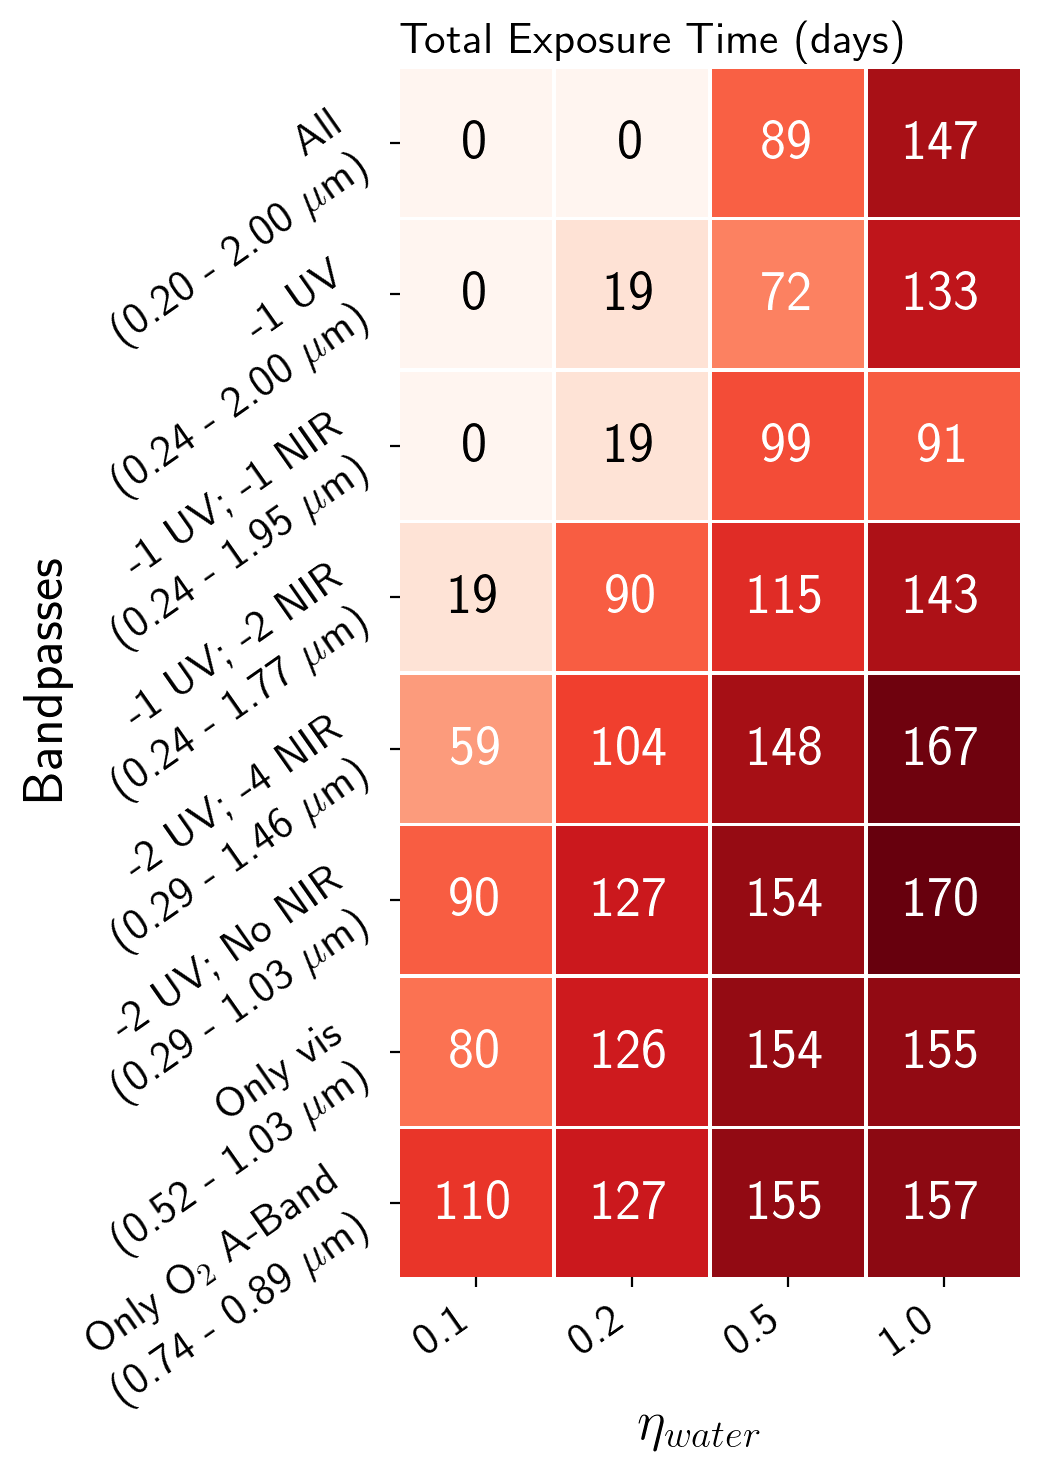

In [25]:
wantexp_days = 365. / 2

# Define eta range
Xdraw = 500
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drmx.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(Ndraws), len(cases), 3))
t_scix = np.zeros((len(Ndraws), len(cases), 3))
t_ovrx = np.zeros((len(Ndraws), len(cases), 3))
countx = np.zeros((len(Ndraws), len(cases), 3))
for i in range(len(Ndraws)):
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraws[i], 
                                                                                                           verbose = False, 
                                                                                                           iremove = cases[j], 
                                                                                                           wantexp_days=wantexp_days)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m

# Make Table of results
fig, ax = ColorTable(etas, case_name_strings, countx[:,:,0], fmt = "%i", data_pm = (countx[:,:,1], countx[:,:,2]), labelfontsize=16, labelrotation=35, 
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of Spectra in %i days" %wantexp_days, ha = "left", fontsize = 16, loc = "left")

fig, ax = ColorTable(etas, case_name_strings, t_totx[:,:,0], fmt = "%i", labelfontsize=16, labelrotation=35, colormap = "Reds",
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01, textsize = 16)
                     #data_pm = (t_totx[:,:,1], t_totx[:,:,2]))
ax[0,0].set_title("Total Exposure Time (days)", ha = "left", fontsize = 16, loc = "left")

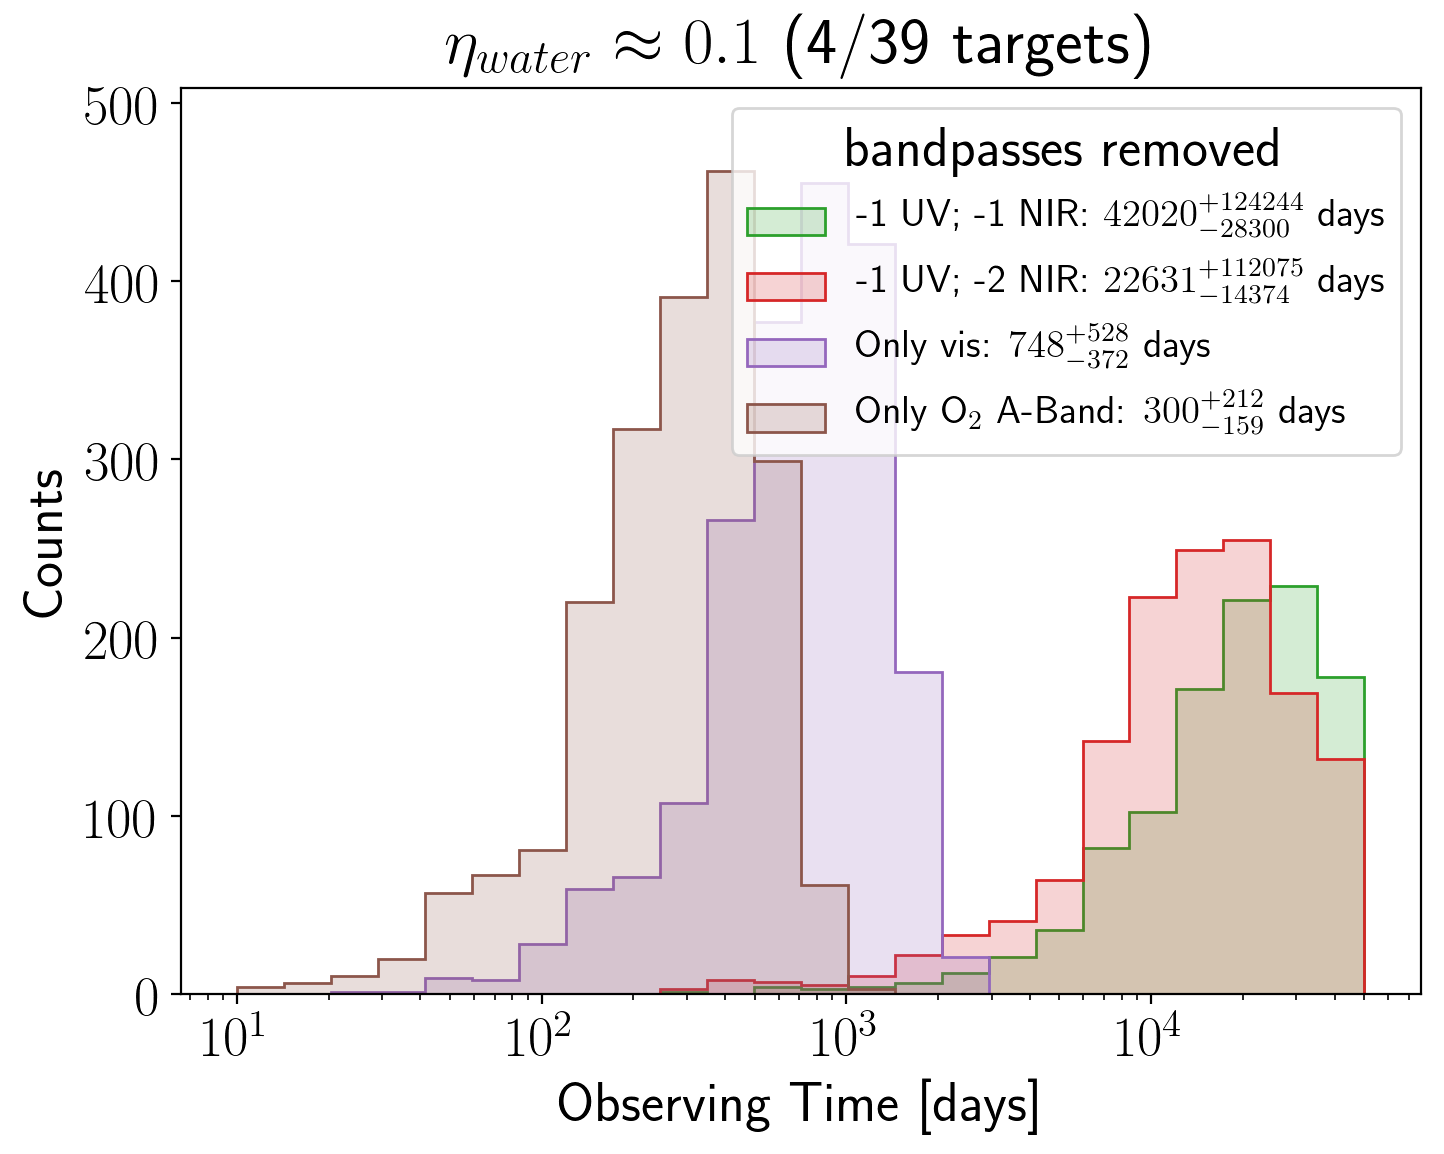

In [21]:
bins = 25
bins = np.logspace(1.0, 4.7, 25)
Xdraw = 2000
ieta = 0
Ndraw = int(np.round(etas[ieta]*drmx.NBIAS))

# Plot exposure time hist
fig, ax = plt.subplots(1, figsize = (8,6))
ax.set_xlabel("Observing Time [days]")
ax.set_ylabel("Counts")
ax.set_title(r"$\eta_{water} \approx %.1f $ (%i/%i targets)" %(float(Ndraw)/float(drmx.NBIAS), Ndraw, drmx.NBIAS))

labels = []
handles = []

for j in range(len(cases))[2:]:
    t_tmp = np.zeros(Xdraw)
    t_sci = np.zeros(Xdraw)
    t_ovr = np.zeros(Xdraw)
    c_tmp = np.zeros(Xdraw)
    c_avg = np.zeros(Xdraw)
    for x in range(Xdraw):
        t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraw, 
                                                                                                       verbose = False, 
                                                                                                       iremove = cases[j], 
                                                                                                       wantexp_days=drmx.wantexp)
        t_tmp[x] = np.sum(t_tot_sort[:]) / 24.
        t_sci[x] = np.sum(t_sci_sort[:]) / 24.
        t_ovr[x] = np.sum(t_ovr_sort[:]) / 24.
        c_tmp[x] = count_in_texp
        c_avg[x] = np.mean(c_tot_sort)
    #q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
    #t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
    #q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
    #t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
    #q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
    #t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
    #q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
    #countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m
    
    label = case_names[j]
    t_totx = t_tmp
    color = "C%i" %j
    ctime_sum = t_totx
    q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(ctime_sum)
    result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
    h = ax.hist(ctime_sum, bins = bins, alpha = .2, color = color, normed=False);
    h2 = ax.hist(ctime_sum, bins = bins, alpha = 1.0, histtype="step", color = color, normed=False);
    handles.append((h[2][0], h2[2][0]))
    #ax.axvline(q_50, color = "w", ls = "dashed")
    #ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
    labels.append(label+": %s days" %result)
    
ax.set_ylim(top = 1.1*np.max(h[0]))
#ax.set_xlim(0.0, 2500)
ax.legend(handles, labels, fontsize = 14, title = "bandpasses removed")
ax.set_xscale("log")

#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_arch%s_removing_bands_expose_hist.pdf" %architecture, bbox_inches = "tight")

In [29]:
icase = 5

iremove = cases[icase]
iname = case_names[icase]

Xdraw = 200
Ndraws = np.arange(1,drmx.NBIAS)
wantdays = np.linspace(5, 365*2, 20)

zcube = np.zeros((len(Ndraws), len(wantdays), Xdraw))

np.random.seed(seed = None)

for i in range(len(Ndraws)):
    for j in range(len(wantdays)):
        for k in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraws[i], wantexp_days = wantdays[j], verbose = False, iremove = iremove) 
            zcube[i,j,k] = count_in_texp
            
zmean = np.mean(zcube, axis = 2)

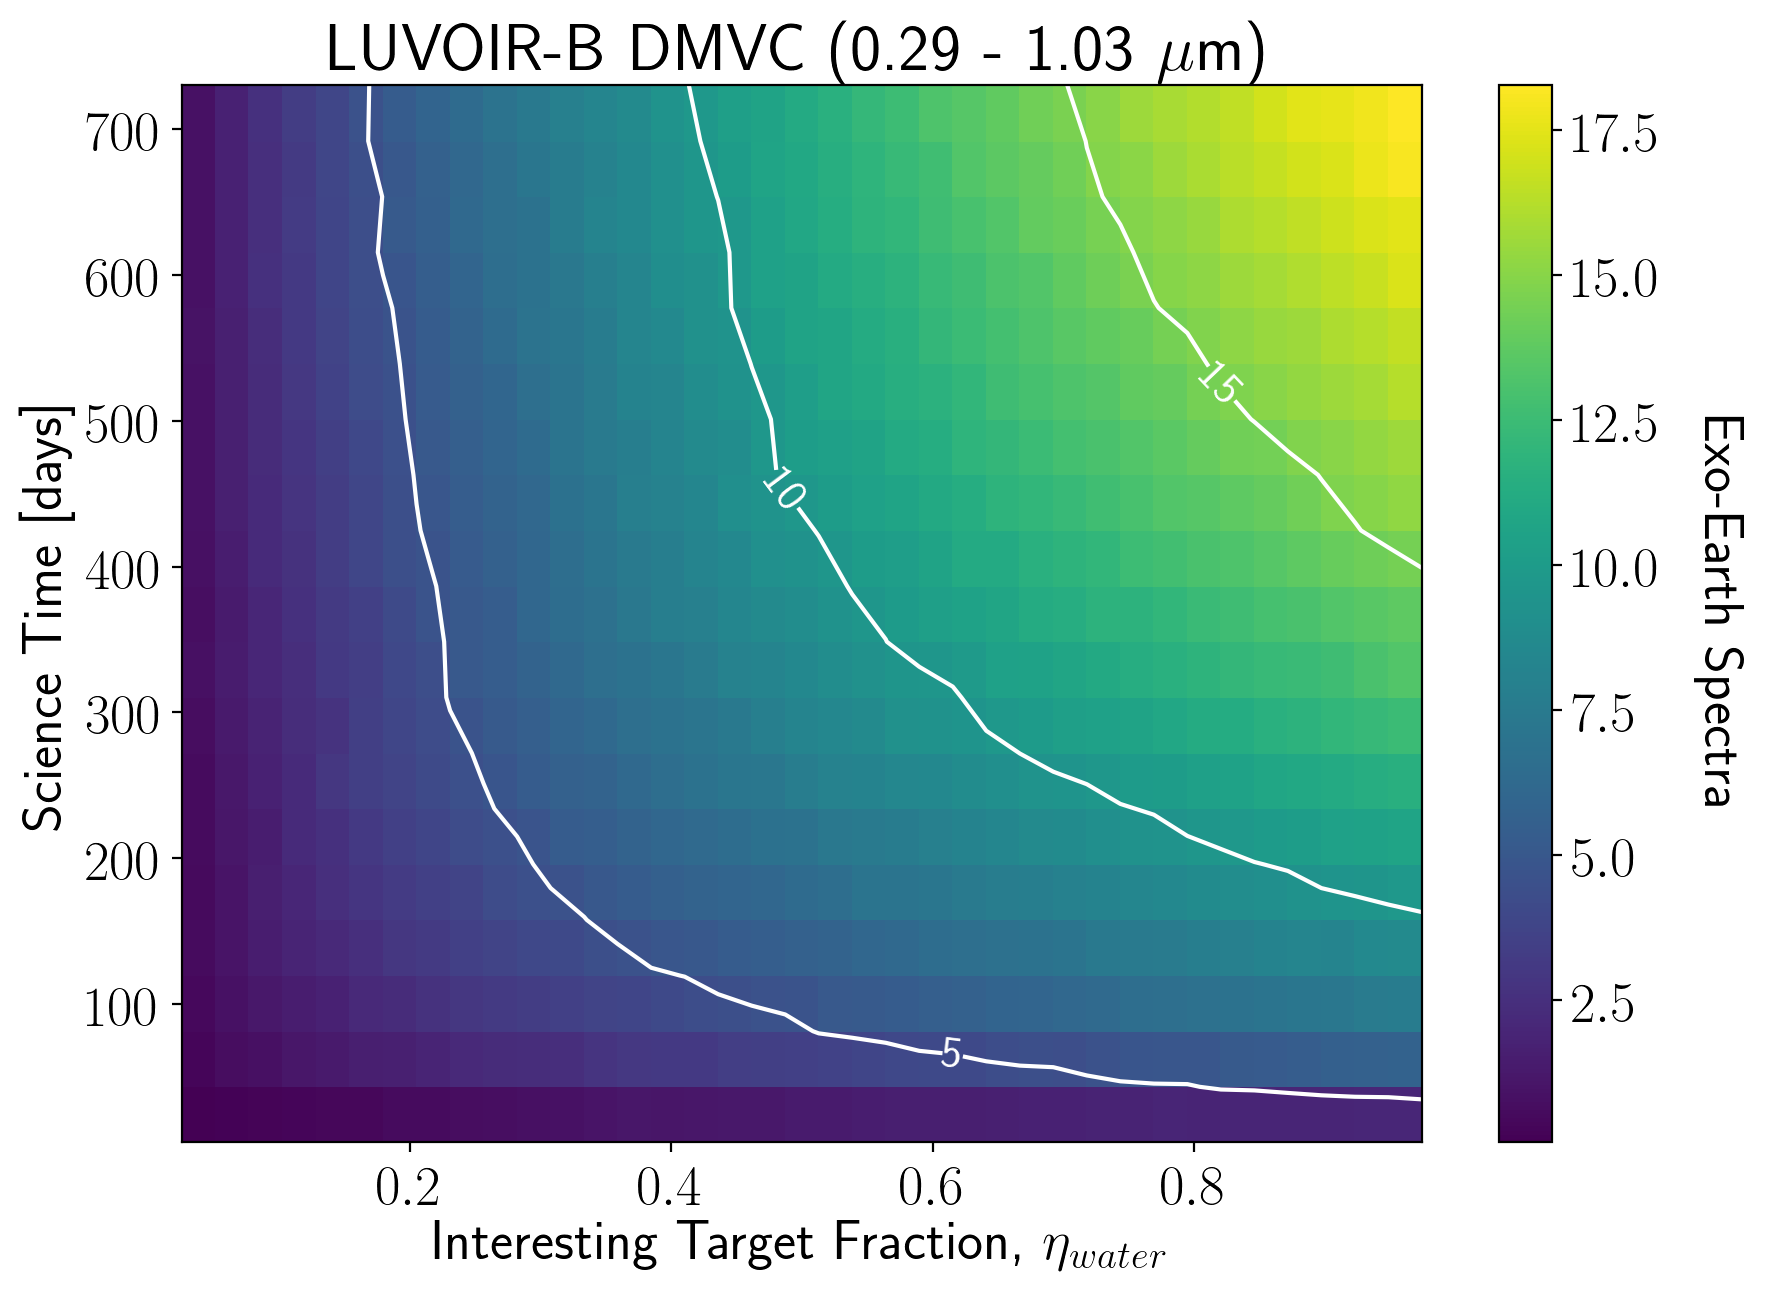

In [30]:
contour_intervals = 5.0
levels = list(np.arange(1, zmean.max() / contour_intervals) * contour_intervals)

fig, ax = plt.subplots(figsize = (10,7))
ax.set_title("%i total stars in sample" %drmx.NBIAS)
#ax.set_title("%i\%%; %s" %(100*drmx.bandwidth, iname))
ax.set_title("LUVOIR-B DMVC (%s)" %(case_range_strings[icase]))
ax.set_xlabel("Interesting Target Fraction, $\eta_{water}$")
ax.set_ylabel("Science Time [days]")
p = ax.pcolor(Ndraws / float(drmx.NBIAS), wantdays, zmean.T)
cln = ax.contour(Ndraws / float(drmx.NBIAS), wantdays, zmean.T, colors="w", levels = levels)
plt.clabel(cln, inline=1, fontsize=16, inline_spacing=1, fmt = "%i", rightside_up = True)
cbar = fig.colorbar(p)
cbar.set_label("Exo-Earth Spectra", rotation = 270, labelpad = 30)
p.set_rasterized(True)
#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_arch%s_time_vs_eta_case4.pdf" %architecture, bbox_inches = "tight")

"""
zstd = np.std(zcube, axis = 2)

fig, ax = plt.subplots()
ax.set_title("%i total stars in sample" %drmx.NBIAS)
ax.set_xlabel("Interesting Target Fraction, $\eta_{water}$")
ax.set_ylabel("Observing Time [days]")
p = ax.pcolor(Ndraws / float(drmx.NBIAS), wantdays, zstd.T)
fig.colorbar(p, label = "Std Num of Complete Spectra")
""";

In [34]:
zmed = np.median(zcube, axis = 2)

In [31]:
xnames = ["alpha", "beta"]

def func(x, eta_water, t, zs):
    
    N = np.zeros_like(zs)
    
    N0 = zs[-1,-1]
    
    for i in range(len(t))[:]:
        N[:,i] = N0 * ((eta_water / eta_water[-1])**x[0] * (t[i] / t[-1])**x[1])
    
    return N

def sum_res(x, eta_water, t, zs):
    
    N = func(x, eta_water, t, zs)
    
    chi2 = np.sum((zs - N)**2.)
     
    return chi2

In [37]:
eta_water = Ndraws / float(drmx.NBIAS)

args = (eta_water, wantdays, zmean)

result = sp.optimize.minimize(sum_res, [1,1], args, method="Nelder-Mead")

zip(xnames, result.x)

[('alpha', 0.7117458885039143), ('beta', 0.39334686674245)]

Text(0.5,1,'LUVOIR-B (0.29 - 1.03 $\\mu$m)')

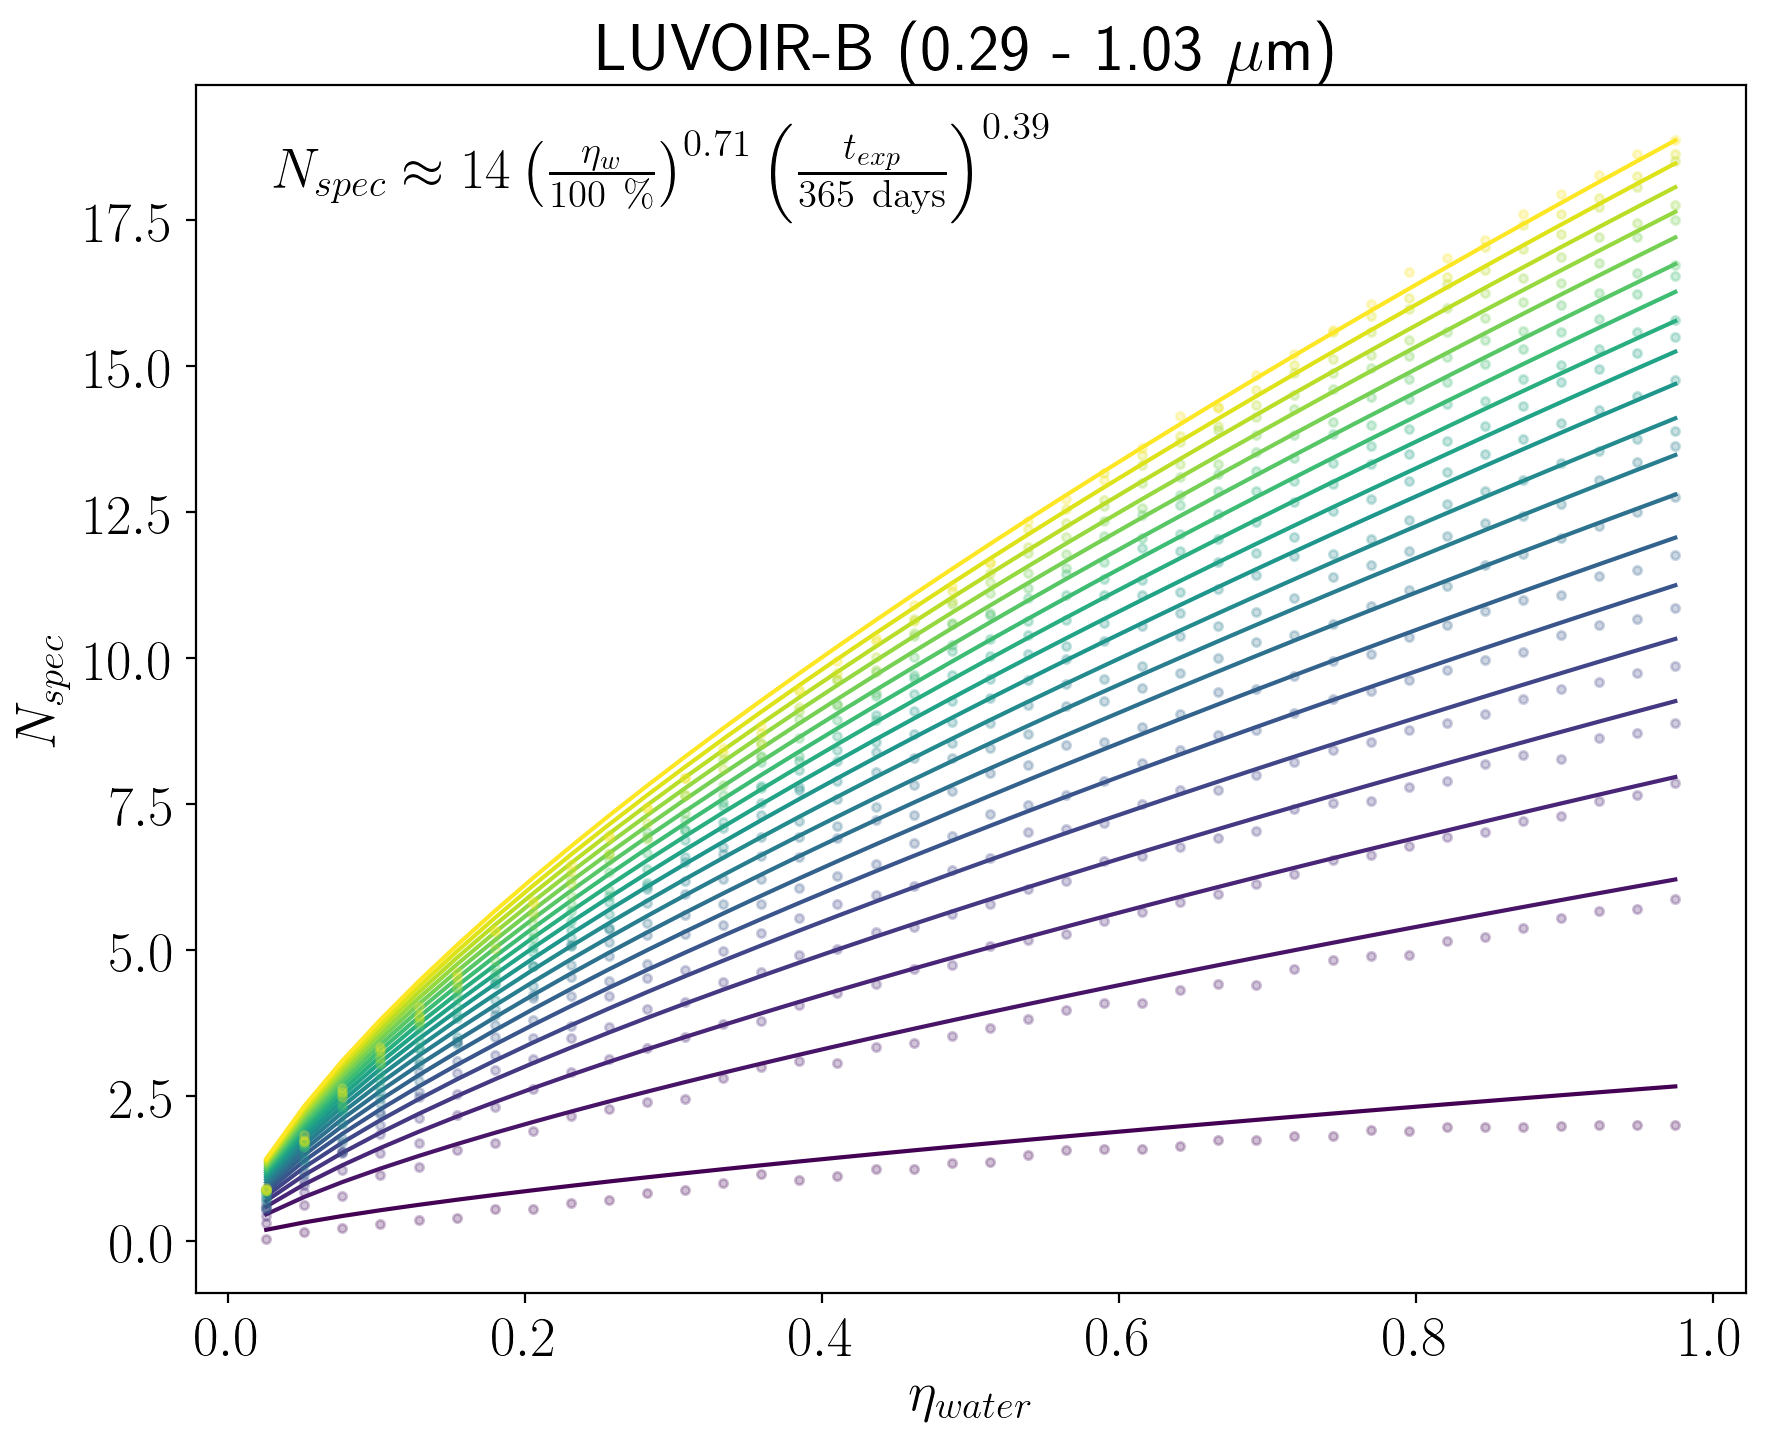

In [38]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel("$\eta_{water}$")
ax.set_ylabel("$N_{spec}$")

#ax.set_xscale("log")
#ax.set_yscale("log")

colors = plt.cm.viridis(np.linspace(0,1, zmean.shape[1]))

N0 = args[-1][-1,-1]
N = func(result.x, *args)

for i in range(zmean.shape[1]):
    #N = N0 * ((eta_water / eta_water[-1])**result.x[0] * (wantdays[i] / wantdays[-1])**result.x[1])
    
    ax.plot(eta_water, N[:,i], color = colors[i])
    ax.plot(eta_water, args[2][:,i], "o", alpha = 0.25, ms = 3, color = colors[i])
    
text = r"$N_{spec} \approx %i \left ( \frac{\eta_{w}}{100 \ \%%} \right ) ^{%.2f} \left ( \frac{t_{exp}}{730 \mathrm{\ days}} \right ) ^{%.2f}$" %(N0, result.x[0], result.x[1])
text = r"$N_{spec} \approx %i \left ( \frac{\eta_{w}}{100 \ \%%} \right ) ^{%.2f} \left ( \frac{t_{exp}}{365 \mathrm{\ days}} \right ) ^{%.2f}$" %(np.round(N0*(0.5)**(result.x[1])), result.x[0], result.x[1])
ax.text(0.05, 0.9, text, transform=ax.transAxes)
ax.set_title("LUVOIR-B (%s)" %(case_range_strings[icase]))

# Specific target example

In [16]:
case_names

['All',
 '-1 UV',
 '-1 UV; -1 NIR',
 '-1 UV; -2 NIR',
 'Only vis',
 'Only O$_2$ A-Band']

In [41]:
wantexp_days = 365. / 2
eta = 0.2
icase = 4

# Calc Ndraw from eta_water
Ndraw = int(np.round(eta*drmx.NBIAS))

# Indices of bandpasses to use
ind = np.delete(np.arange(len(drmx.bandpasses)), cases[icase])

# Set RNG seed for reproducible randomness
np.random.seed(seed = 10)

print("Case: %s (%.2f - %.2f µm)" %(case_names[icase], drmx.bandpasses[ind].min(), drmx.bandpasses[ind].max()))
t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraw, 
                                                                                               verbose = True, 
                                                                                               iremove = cases[icase], 
                                                                                               wantexp_days=wantexp_days)

# Set RNG seed back to None
np.random.seed(seed = None)

Case: -2 UV; -4 NIR (0.29 - 1.46 µm)
HIP105090 - M1/M2V - 3.97pc
    - 58.9% Complete Spectrum : 59.85 days
    - UV Spectrum : 45.04 days
    - Optical Spectrum : 14.81 days
    - NIR Spectrum : 46.44 days
    - Overhead 6.60 days
HIP105858 - F6V - 9.27pc
    - 66.1% Complete Spectrum : 753.77 days
    - UV Spectrum : 33.26 days
    - Optical Spectrum : 720.52 days
    - NIR Spectrum : 731.45 days
    - Overhead 76.04 days
HIP3583 - G5IV - 14.99pc
    - 66.1% Complete Spectrum : 383.02 days
    - UV Spectrum : 37.46 days
    - Optical Spectrum : 268.99 days
    - NIR Spectrum : 383.02 days
    - Overhead 38.97 days
HIP27072 - F7V - 8.88pc
    - 66.1% Complete Spectrum : 57.01 days
    - UV Spectrum : 3.02 days
    - Optical Spectrum : 30.48 days
    - NIR Spectrum : 57.01 days
    - Overhead 6.37 days
HIP16537 - K2V - 3.20pc
    - 66.1% Complete Spectrum : 20.07 days
    - UV Spectrum : 2.74 days
    - Optical Spectrum : 20.07 days
    - NIR Spectrum : 13.10 days
    - Overhead 2.67 d